In [191]:
#import os
#import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Imputer

from __future__ import print_function
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

from sklearn import decomposition, metrics
from sklearn.preprocessing import scale, robust_scale
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

#from sklearn.cluster import DBSCAN
#from sklearn.manifold import TSNE

%matplotlib inline

This afternoon we're starting off with a fairly simple data challenge from the world of biology. Please limit yourself to 3 hours time! At the end of the 3 hours we will have 1 hour of presentations by you guys to showcase your results and findings. 

Your task is to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. 

Even though this seems like a fairly straightforward task, there are so many ways you can explore, visualize, engineer your features, and tell a story with this data! Being able to clearly communicate your thought process is one of the most important parts of a data challenge. Some important questions to think about are: how can you best explore the data? Why did you select your particular model? How did you validate your model?

Please code and annotate your analysis in an Jupyter notebook.  If you are insistent on using R, there are ways to do that in Jupyter as well. No one has demos today so please complete everything this afternoon and then upload your final product into Dropbox (Data Challenges/Week 5).

The dataset consists of 699 cells for which you have the following features:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)


... and the dataset is available here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

In [7]:
# Assign the column names to a list
col_names = ["Sample code number","Clump Thickness","Uniformity of Cell Size", "Uniformity of Cell Shape","Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei","Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [13]:
len(col_names)

11

I downloaded the data as breast-cancer-wisconsin.data.csv. Here I will import it.

In [9]:
# Read in data
filename = '/Users/tswenson/Documents/Joels/Health_Data_Science/breast-cancer-wisconsin.data.csv'
my_data=pd.read_csv(filename, index_col = 0, names = col_names)

In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [15]:
my_data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [16]:
# If all columns are integers, the number of columns in the pandas df should be len(col_names) - 1
my_data.describe().shape[1] == len(col_names) - 1

False

In [17]:
my_data.describe().shape[1]

9

In [12]:
my_data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


Investigate why "Bare Nuclei" is an object and not an int

In [22]:
sum(my_data["Clump Thickness"].isnull())

0

In [24]:
#my_data.applymap(lambda x: isinstance(x, (int, float)))

In [54]:
!cut -f7 -d',' /Users/tswenson/Documents/Joels/Health_Data_Science/breast-cancer-wisconsin.data.csv|sort |uniq -c

 402 1
 132 10
  30 2
  28 3
  19 4
  30 5
   4 6
   8 7
  21 8
   9 9
  16 ?


OK, so "Bare Nuclei" has a question mark in it, lets change it to NaN and convert that column to int64. Note that I might want to impute that value or remove that row.

In [34]:
print((my_data["Bare Nuclei"] == '?').sum())

16


In [37]:
# Replace question marks with NaN
my_clean_nand_data = my_data.replace({'?': np.nan}).astype(float)
# Delete rows that have question marks
my_clean_trunc_data = my_data.replace({'?': np.nan}).dropna().astype(float)

In [38]:
my_clean_nand_data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [39]:
my_clean_nand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump Thickness                699 non-null float64
Uniformity of Cell Size        699 non-null float64
Uniformity of Cell Shape       699 non-null float64
Marginal Adhesion              699 non-null float64
Single Epithelial Cell Size    699 non-null float64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null float64
Normal Nucleoli                699 non-null float64
Mitoses                        699 non-null float64
Class                          699 non-null float64
dtypes: float64(10)
memory usage: 60.1 KB


# Impute missing data...
note that I'm not happy about this method of imputation and should try to do so more intelligently (e.g. using the amelia package in R, or mice in python)....but I need to keep moving on

In [57]:
my_clean_nand_data["Bare Nuclei"].shape

(699,)

In [82]:
imputer = Imputer(missing_values='NaN', strategy='median',axis=0)
new_data = imputer.fit_transform(my_clean_nand_data)
my_imp_data = pd.DataFrame(new_data,columns = col_names[1::], index = my_data.index)
print(my_imp_data.describe())
print(my_imp_data.info())
print(my_imp_data.head())



       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count       699.000000               699.000000                699.000000   
mean          4.417740                 3.134478                  3.207439   
std           2.815741                 3.051459                  2.971913   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count         699.000000                   699.000000   699.000000   
mean            2.806867                     3.216023     3.486409   
std             2.855379                     2.214300     3.621929   
min             1.000000  

# Finally, start to explore the data 

In [101]:
#plt.figure(figsize=(40,40))
plt.gcf().clear()
#plt.subplot(121)
axes = pd.tools.plotting.scatter_matrix(my_imp_data,alpha = 0.5,figsize=(20,20))
plt.tight_layout()
#plt.show()
plt.savefig(filename + '__scatterplot_mat.png')
plt.close()

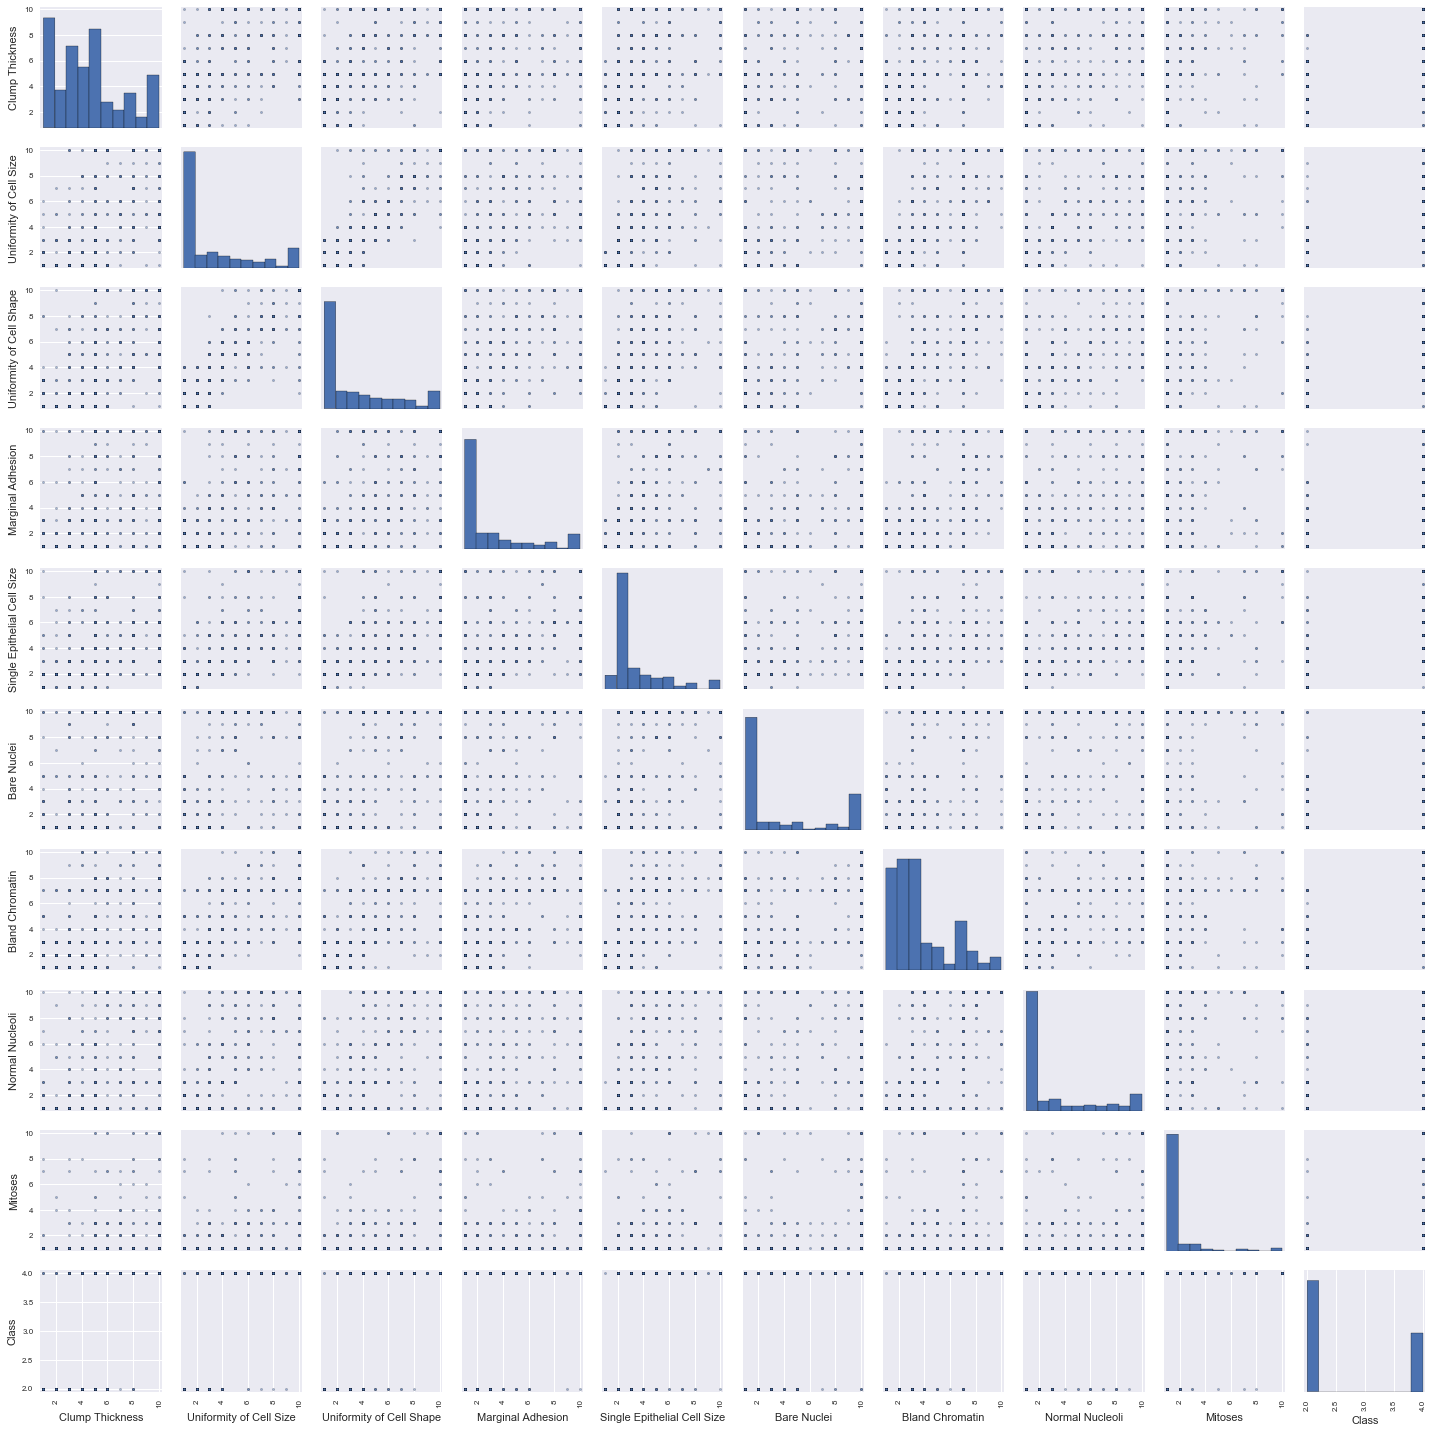

In [102]:
plt.figure(figsize=(40,40))
plt.gcf().clear()
#plt.subplot(121)
axes = pd.tools.plotting.scatter_matrix(my_imp_data,alpha = 0.5,figsize=(20,20))
plt.tight_layout()
plt.show()

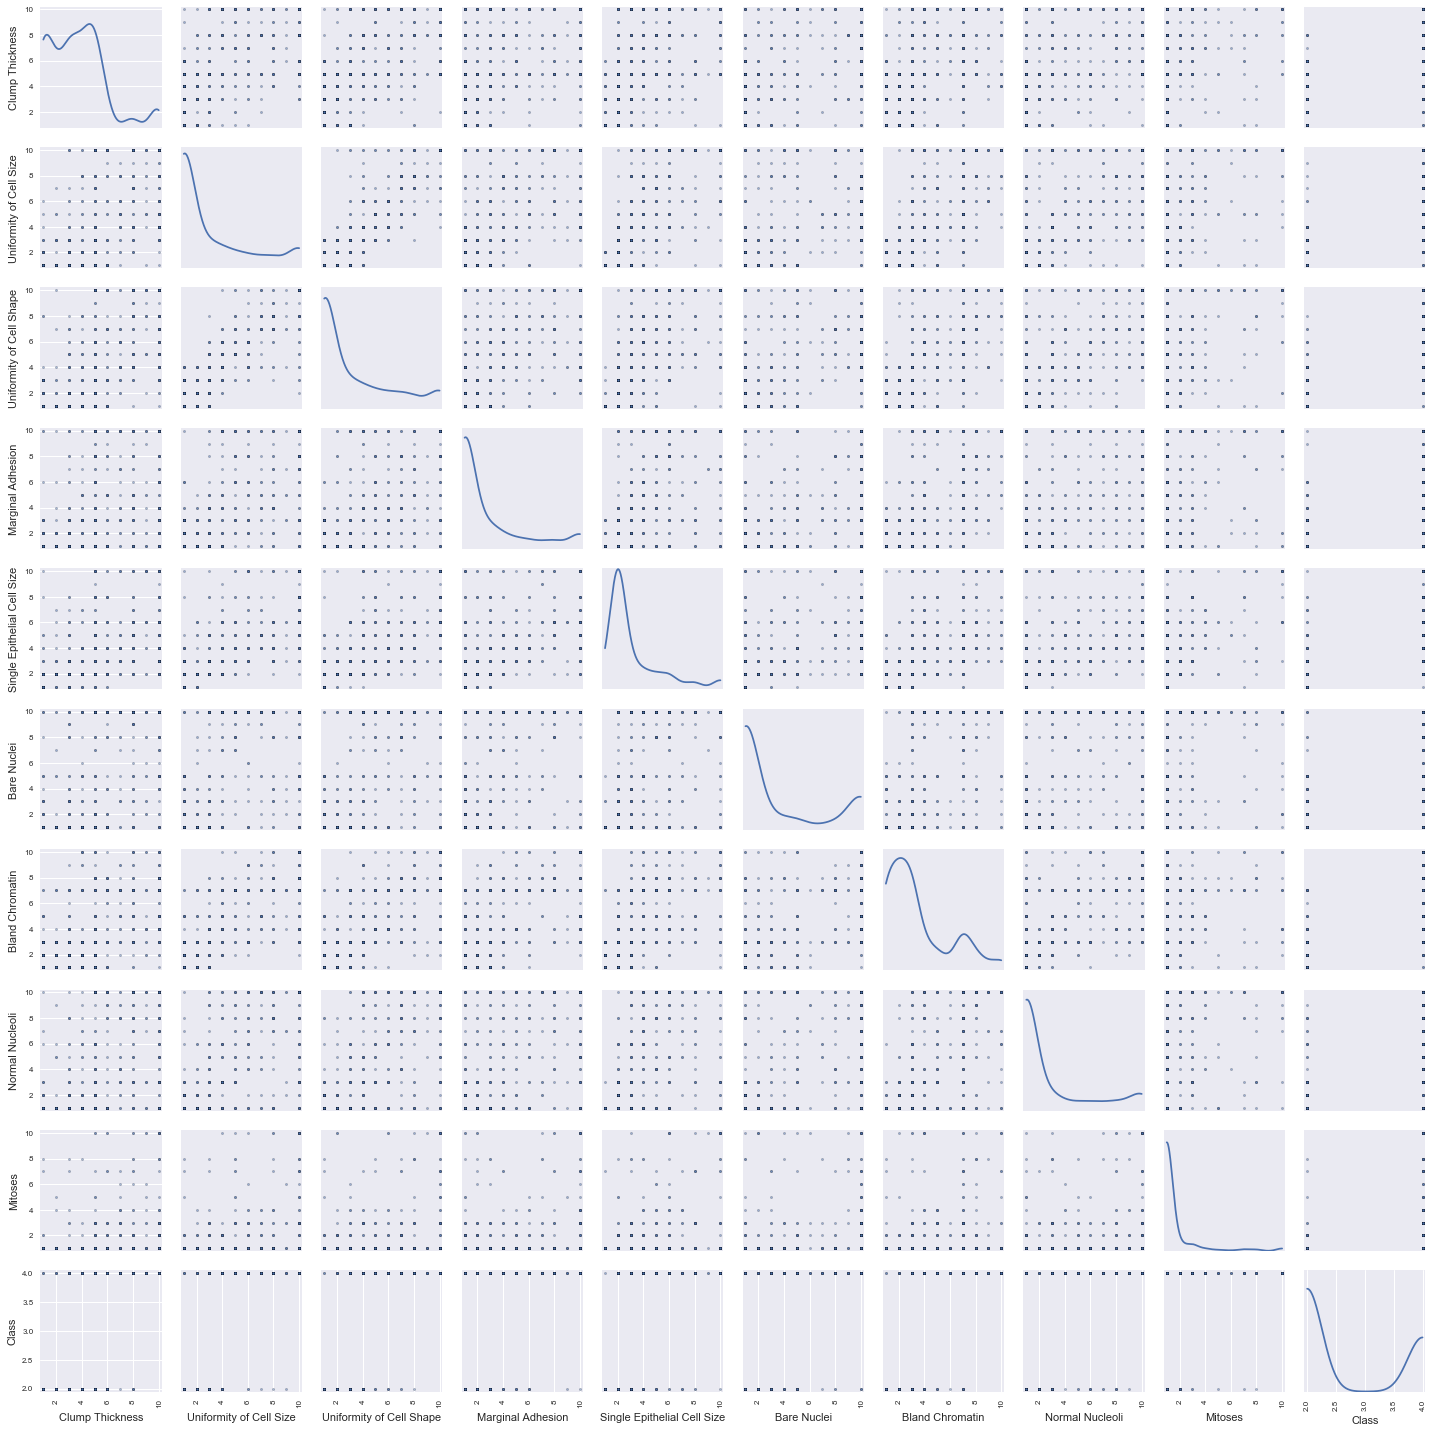

In [104]:
plt.figure(figsize=(40,40))
plt.gcf().clear()
#plt.subplot(121)
axes = pd.tools.plotting.scatter_matrix(my_imp_data,alpha = 0.5,figsize=(20,20),diagonal="kde")
plt.tight_layout()
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

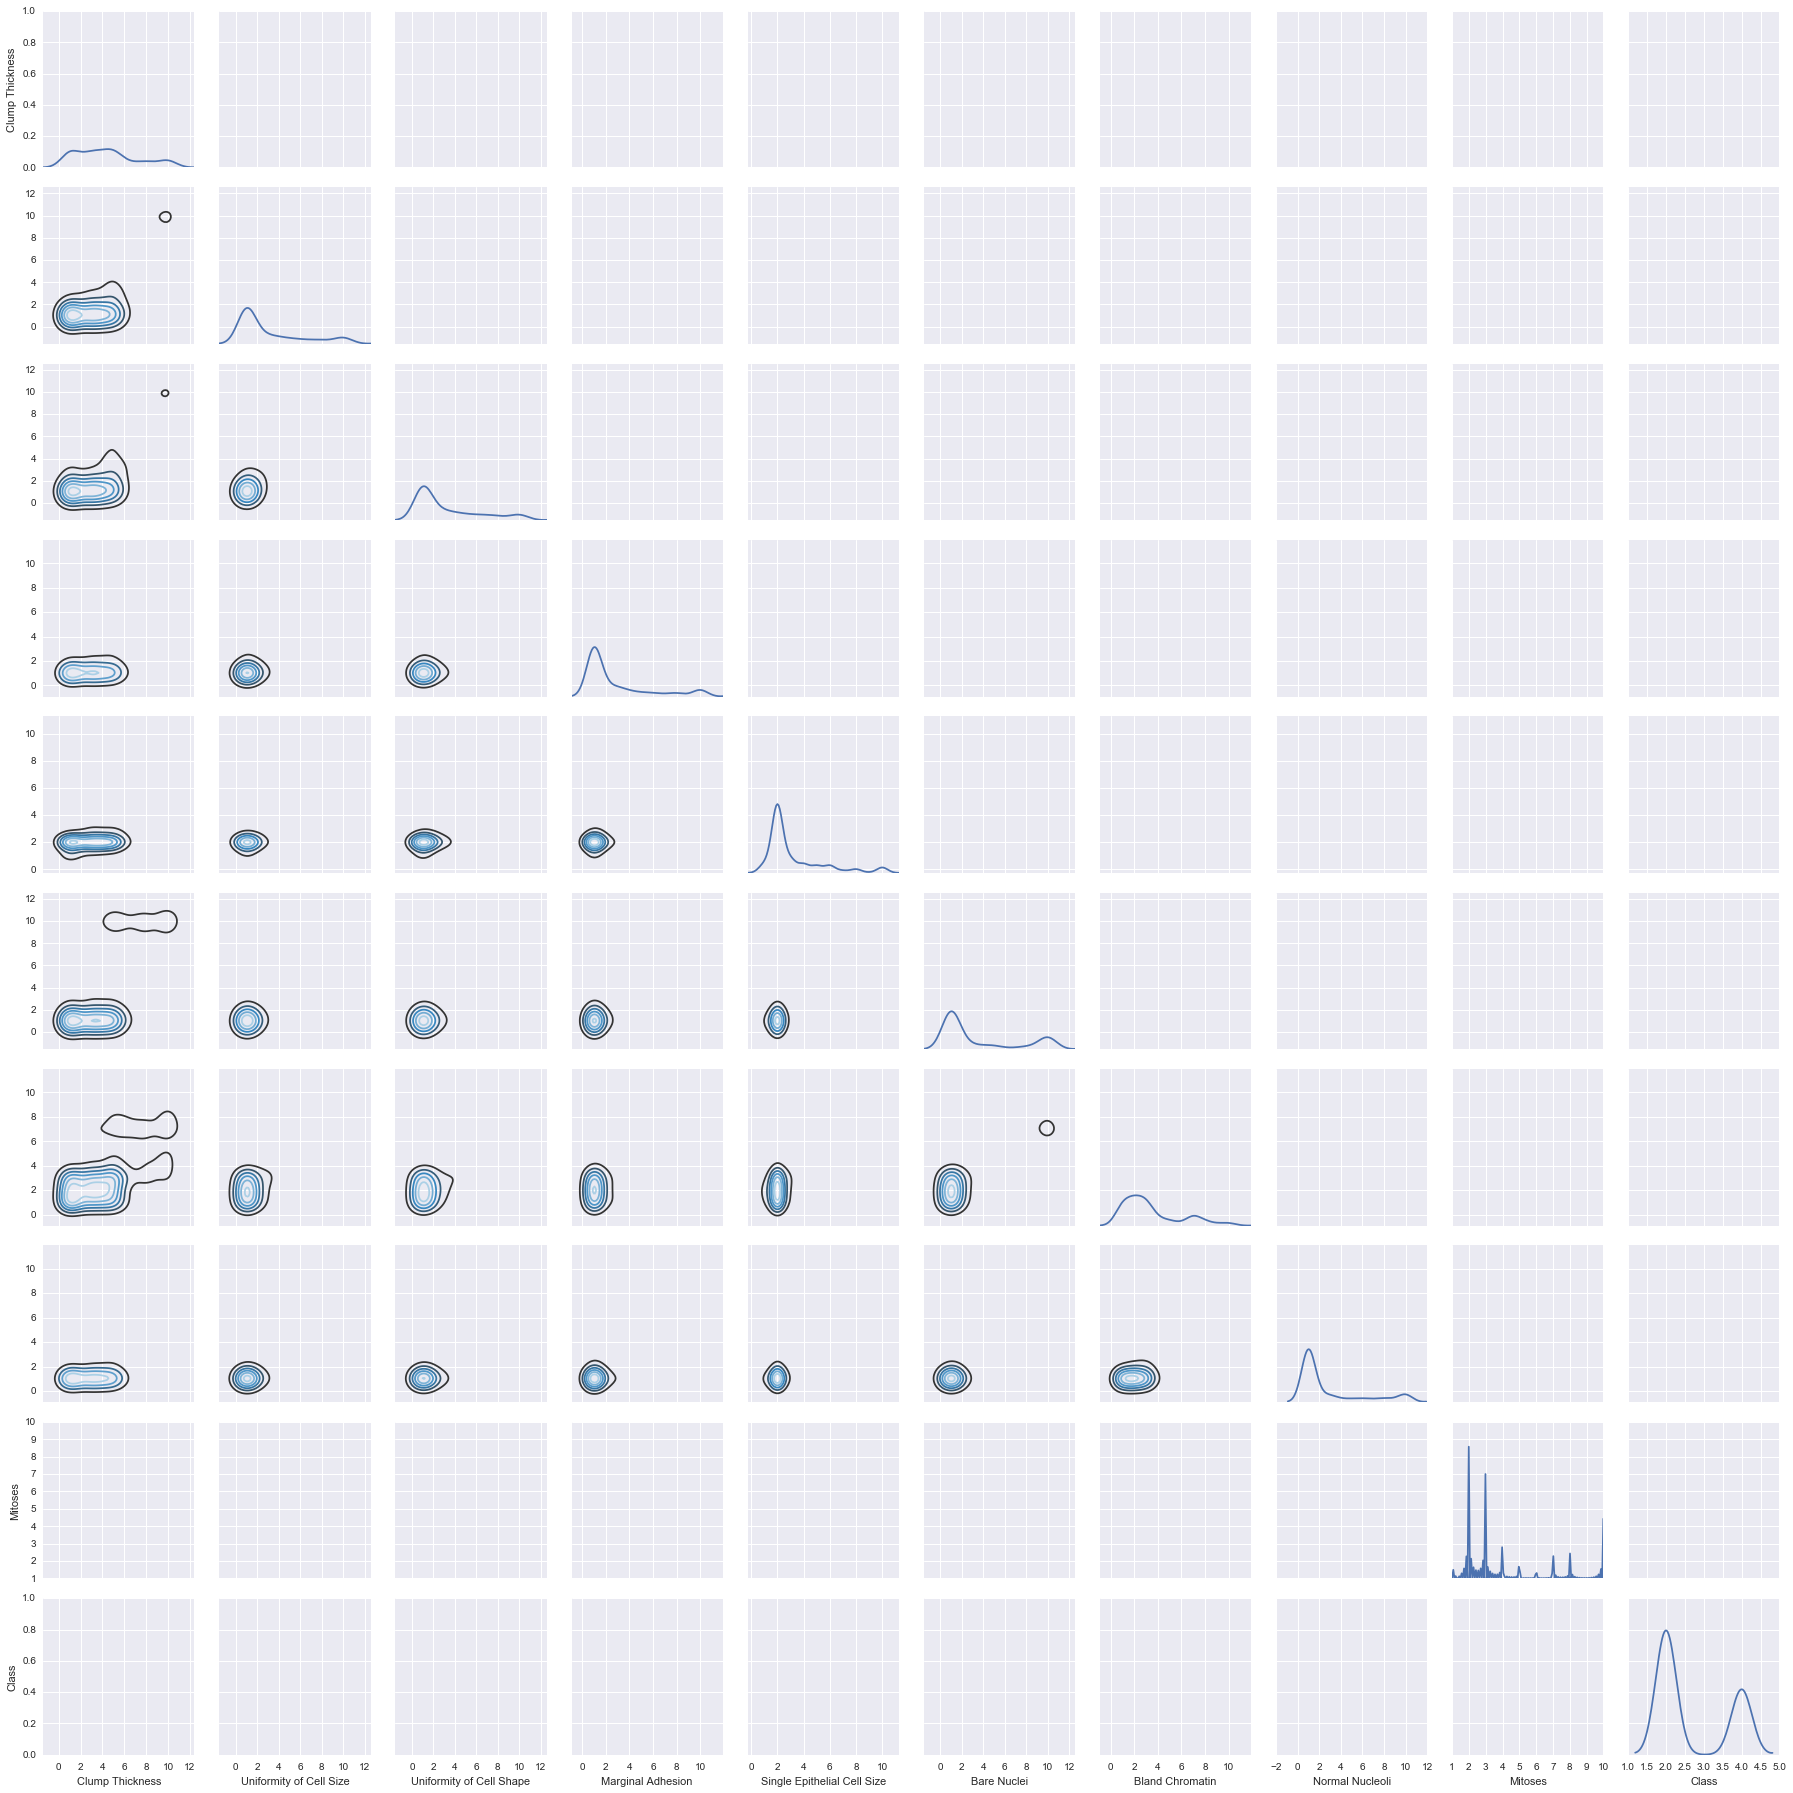

In [108]:
#plt.figure(figsize=(40,40))
#plt.gcf().clear()
g = sns.PairGrid(my_imp_data)
g.map_diag(sns.kdeplot())
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels = 6)
sns.plt.show()

ValueError: minvalue must be less than or equal to maxvalue

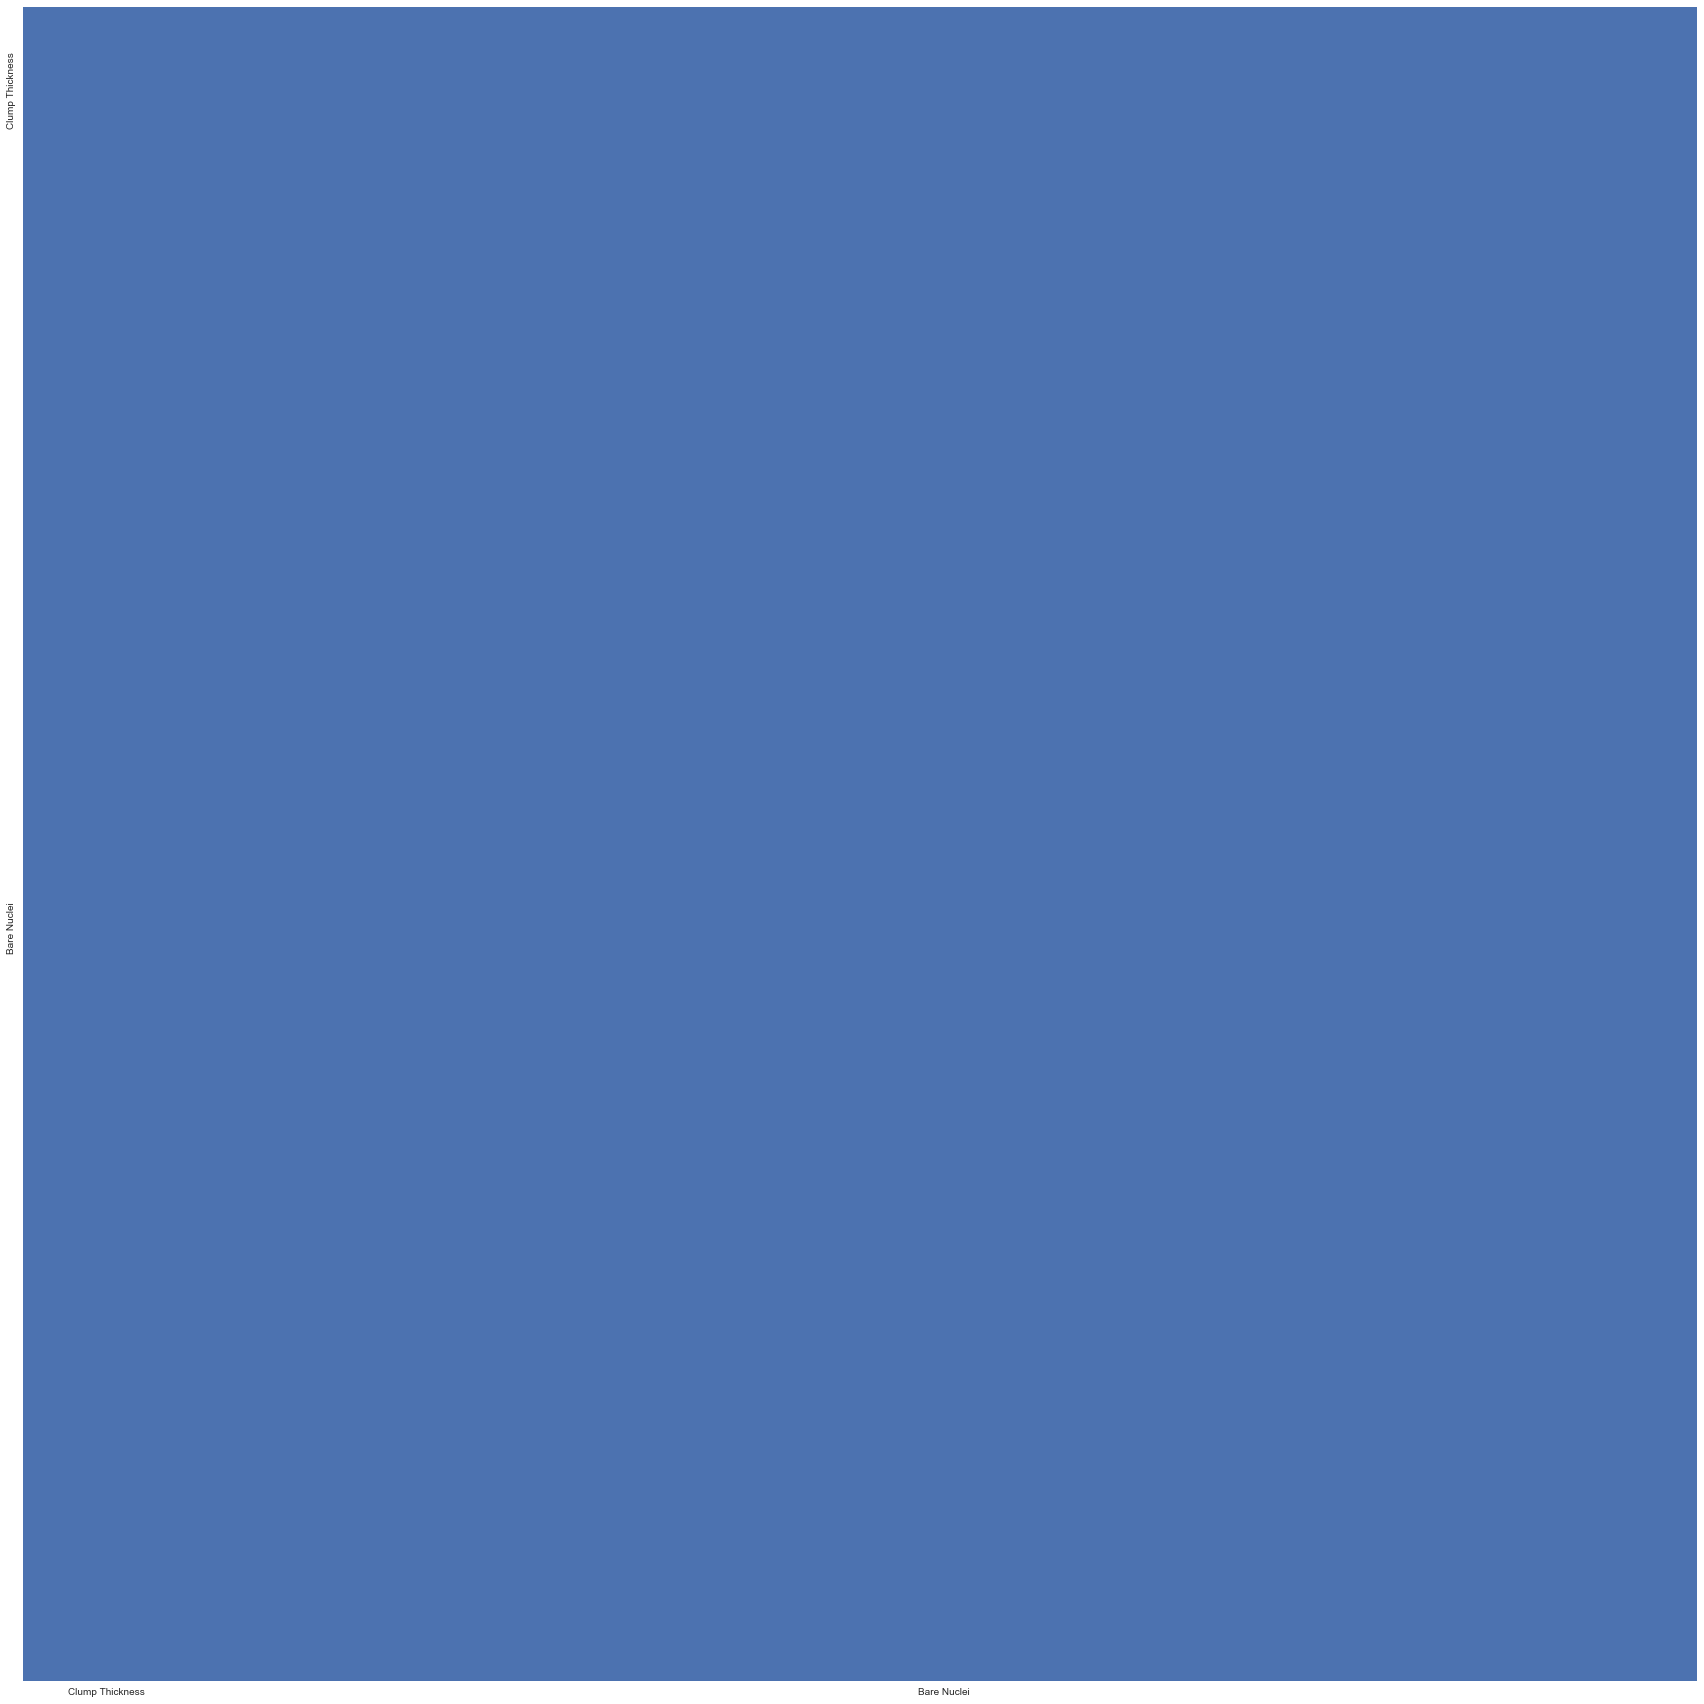

In [119]:
sns.set(style="white")
# Compute the correlation matrix
corr = my_imp_data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5)

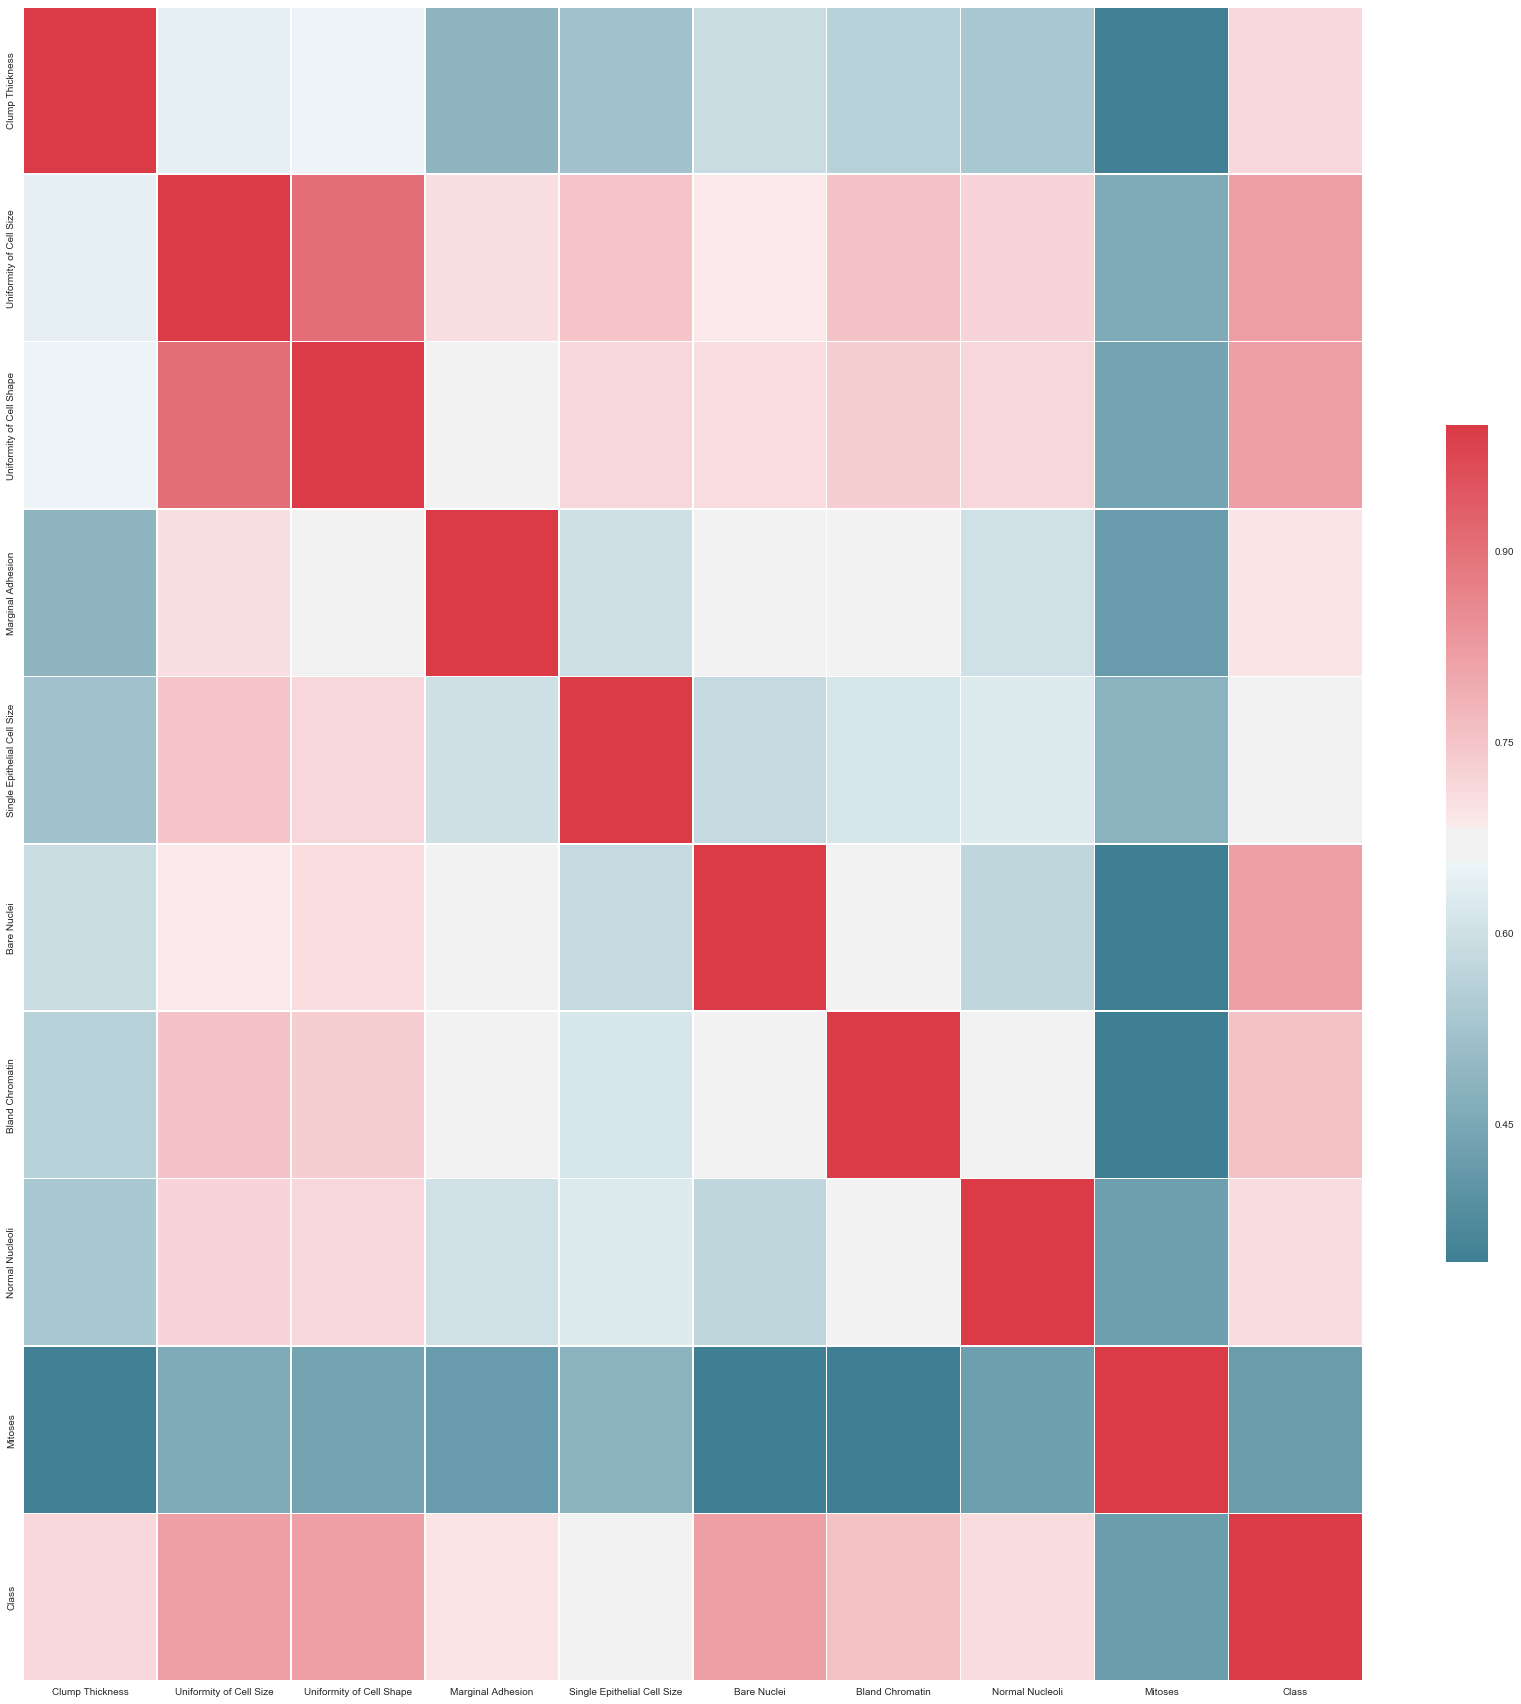

In [123]:
sns.set(style="white")
# Compute the correlation matrix
corr = my_imp_data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, 
           linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### All that work just to confirm that uniformity of cell size and cell shape are very related

# Start some basic modelling 

###### Dimension reduction using PCA

In [125]:
# Find data columns
my_data_headers = list(my_data)
meta_headers = ["Class"]
my_data_data_headers = [x for x in my_data_headers if not x in meta_headers]

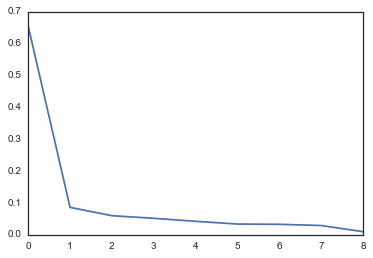

In [130]:
# Scale the data columns
my_scaled_data = scale(my_imp_data[my_data_data_headers])
# Perform PCA
pca = decomposition.PCA()
pca.fit(my_scaled_data)
var=pca.explained_variance_ratio_
plt.plot(var)

[  65.45   74.06   80.05   85.22   89.45   92.82   96.11   99.02  100.01]


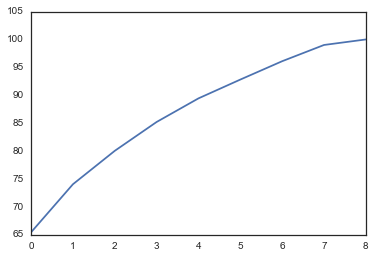

In [132]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
print(var1)

In [133]:
#### Based on the above transform the data
pca = decomposition.PCA(n_components = 7)
my_scaled_data_transformed = pca.fit_transform(my_scaled_data)

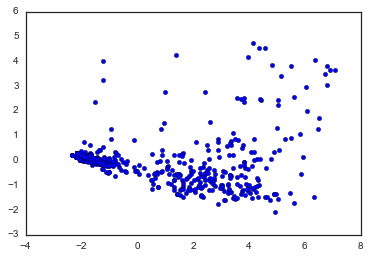

In [134]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(my_scaled_data_transformed[:,[0]],my_scaled_data_transformed[:,[1]])

###### Now plot the first two components and label the cancer cells with white dots.

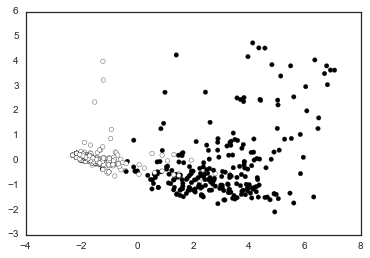

In [135]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(my_scaled_data_transformed[:,[0]],my_scaled_data_transformed[:,[1]], c=my_imp_data["Class"])

###### Now plot the second and third components and label the cancer cells with white dots.

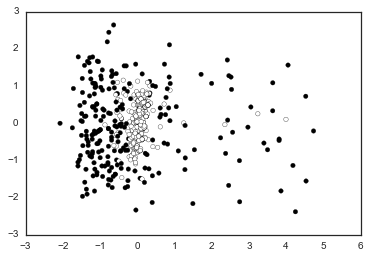

In [136]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(my_scaled_data_transformed[:,[1]],my_scaled_data_transformed[:,[2]], c=my_imp_data["Class"])

The above looks promising to proceed

In [145]:
print(my_scaled_data_transformed.shape)
print(my_scaled_data_transformed_pd.shape)
print(my_clean_imp_data[meta_headers].shape)

(699, 7)
(699, 7)
(699, 1)


In [151]:
# Convert transformed data into a pandas dataframe and then combine it with the meta data
my_scaled_data_transformed_pd = pd.DataFrame(my_scaled_data_transformed)

my_scaled_data_transformed_pd["Class"] = my_imp_data["Class"].values

In [158]:
#my_data_heamy_data_headers = list(my_data)
print(list(my_scaled_data_transformed_pd))

[0, 1, 2, 3, 4, 5, 6, 'Class']


In [159]:
my_real_data_headers = [x for x in list(my_scaled_data_transformed_pd)\
                        if not x in meta_headers]

## Try a logistical regression

In [165]:
X_train, X_test, y_train, y_test = \
train_test_split(my_scaled_data_transformed_pd[my_real_data_headers], \
                 my_scaled_data_transformed_pd["Class"])

In [166]:
X_train.shape, y_train.shape

((524, 7), (524,))

In [169]:
cl1 = LogisticRegression()
cl1.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
cl1_prediction = cl1.predict(X_test)

In [177]:
print(classification_report(y_test,cl1_prediction))

             precision    recall  f1-score   support

        2.0       0.99      0.97      0.98       121
        4.0       0.93      0.98      0.95        54

avg / total       0.97      0.97      0.97       175



Try a different penalty

In [183]:
cl1 = LogisticRegression(penalty='l1')
cl1.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [184]:
cl1_prediction = cl1.predict(X_test)
print(classification_report(y_test,cl1_prediction))

             precision    recall  f1-score   support

        2.0       0.97      0.98      0.98       113
        4.0       0.97      0.95      0.96        62

avg / total       0.97      0.97      0.97       175



##### Try elastic net regularization...didn't finish it 

In [189]:
alpha = 0.1
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.845521


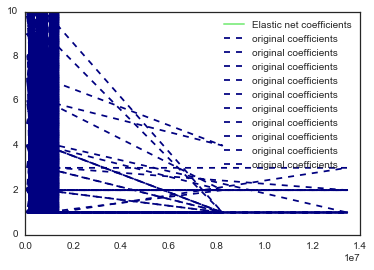

In [194]:
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(my_imp_data, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.show()

In [195]:
print(classification_report(y_test,y_pred_enet))

ValueError: Mix type of y not allowed, got types set(['binary', 'continuous'])

#### Do multinomialNB on untransformed data...since I can't use negative values and I don't have time to shift everything

In [178]:
X_train, X_test, y_train, y_test = \
train_test_split(my_imp_data[my_data_data_headers], \
                 my_imp_data["Class"])

In [179]:
cl2 = MultinomialNB()

In [180]:
cl2.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [181]:
cl2_prediction = cl2.predict(X_test)

In [182]:
print(classification_report(y_test,cl2_prediction))

             precision    recall  f1-score   support

        2.0       0.88      0.95      0.91       113
        4.0       0.89      0.77      0.83        62

avg / total       0.89      0.89      0.88       175



# Next try SVM or hierarchical clustering